# "Target2 Saldos by ECB"
> "Capital flows between European Central Banks since 2001"

- toc:true
- branch: master
- badges: true
- comments: true
- author: <a href=https://github.com/claudia-chehade/>Claudia Chehade</a>
- image: images/target2_small.png
- categories: [ECB, Capital Flow, Target2]

In [80]:
# hide
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import ecb_utils as ecb

In [81]:
# hide
df_target2 = pd.read_csv('data\data.csv', skiprows=1)

In [82]:
# hide
df_target2.tail(20)

,Unnamed: 0,TGB.M.4F.E.A094T.U2.EUR.A,TGB.M.4F.E.A094T.U2.EUR.E,TGB.M.AT.N.A094T.U2.EUR.A,TGB.M.AT.N.A094T.U2.EUR.E,TGB.M.BE.N.A094T.U2.EUR.A,TGB.M.BE.N.A094T.U2.EUR.E,TGB.M.CY.N.A094T.U2.EUR.A,TGB.M.CY.N.A094T.U2.EUR.E,TGB.M.DE.N.A094T.U2.EUR.A,...,TGB.M.NL.N.A094T.U2.EUR.A,TGB.M.NL.N.A094T.U2.EUR.E,TGB.M.PT.N.A094T.U2.EUR.A,TGB.M.PT.N.A094T.U2.EUR.E,TGB.M.SI.N.A094T.U2.EUR.A,TGB.M.SI.N.A094T.U2.EUR.E,TGB.M.SK.N.A094T.U2.EUR.A,TGB.M.SK.N.A094T.U2.EUR.E,TGB.M.U4.N.A094T.U2.EUR.A,TGB.M.U4.N.A094T.U2.EUR.E
217,2002Aug,-,NaN,2010.95,NaN,-5043.36,NaN,-,NaN,5279.91,...,-3590.41,NaN,-5397.18,NaN,-,NaN,-,NaN,-,NaN
218,2002Jul,-,NaN,2681.96,NaN,-3184.17,NaN,-,NaN,-7744.30,...,1378.30,NaN,-5792.83,NaN,-,NaN,-,NaN,-,NaN
219,2002Jun,-,NaN,2742.68,NaN,-1124.26,NaN,-,NaN,-8993.05,...,1142.58,NaN,-6001.16,NaN,-,NaN,-,NaN,-,NaN
220,2002May,-,NaN,4086.61,NaN,-4568.13,NaN,-,NaN,-9102.57,...,4329.22,NaN,-6229.52,NaN,-,NaN,-,NaN,-,NaN
221,2002Apr,-,NaN,2936.55,NaN,-4216.20,NaN,-,NaN,-11375.50,...,5324.90,NaN,-6439.35,NaN,-,NaN,-,NaN,-,NaN
222,2002Mar,-,NaN,2391.10,NaN,-6237.75,NaN,-,NaN,-12697.10,...,5062.45,NaN,-6179.95,NaN,-,NaN,-,NaN,-,NaN
223,2002Feb,-,NaN,2872.50,NaN,-4534.05,NaN,-,NaN,-17497.00,...,2669.50,NaN,-5479.10,NaN,-,NaN,-,NaN,-,NaN
224,2002Jan,-,NaN,574.26,NaN,-1455.70,NaN,-,NaN,-27310.00,...,571.04,NaN,-5545.74,NaN,-,NaN,-,NaN,-,NaN
225,2001Dec,-,NaN,-307.67,NaN,-6002.62,NaN,-,NaN,-19445.71,...,-1304.48,NaN,-5401.24,NaN,-,NaN,-,NaN,-,NaN
226,2001Nov,-,NaN,-1443.50,NaN,-5378.05,NaN,-,NaN,-8444.05,...,-1241.32,NaN,-5826.05,NaN,-,NaN,-,NaN,-,NaN


In [83]:
# hide
df_target2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 43 columns):
Unnamed: 0                   236 non-null object
TGB.M.4F.E.A094T.U2.EUR.A    237 non-null object
TGB.M.4F.E.A094T.U2.EUR.E    149 non-null object
TGB.M.AT.N.A094T.U2.EUR.A    237 non-null object
TGB.M.AT.N.A094T.U2.EUR.E    149 non-null object
TGB.M.BE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.BE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.CY.N.A094T.U2.EUR.A    237 non-null object
TGB.M.CY.N.A094T.U2.EUR.E    149 non-null object
TGB.M.DE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.DE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.EE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.EE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.ES.N.A094T.U2.EUR.A    237 non-null object
TGB.M.ES.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FI.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FI.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FR.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FR.N.A0

In [84]:
# hide
# collect all column names containing '(A)' for avarage and containing '(E)' for end of period
columns = list(df_target2.columns)
columns_e = [col for col in columns if col.endswith('.E')]
columns_a = [col for col in columns if col.endswith('.A')]

countries_with_low_target2=['Austria', 'Cyprus', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Slovakia', 'Slovenia', 'Extra Euro area']
countries_with_low_target2

['Austria',
 'Cyprus',
 'Estonia',
 'Latvia',
 'Lithuania',
 'Malta',
 'Slovakia',
 'Slovenia',
 'Extra Euro area']

In [85]:
# hide
df_average = ecb.reduce_data(df_target2, 
                         ', NCBs, Average of observations through period', 
                         columns_e, 
                         countries_with_low_target2)
df_end_period = ecb.reduce_data(df_target2, 
                            ', NCBs, End of period', 
                            columns_a, 
                            countries_with_low_target2)

df_average.rename(columns={'European Central Bank (ECB), ECB, Average of observations through period': 'ECB'}, inplace=True)
df_end_period.rename(columns={'European Central Bank (ECB), ECB, End of period': 'ECB'}, inplace=True)

In [86]:
#hide
df_average

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,0.00,-6492.05,-11567.59,40955.41,-1172.95,-1552.27,-1121.91,-2983.82,-7614.55,-12389.86,2025.45,-5172.27
2001-02,0.00,-6924.85,-2932.05,32958.50,-2030.95,-225.85,-1374.70,-4317.45,-2692.00,-12185.80,-1638.65,-5403.90
2001-03,0.00,-7038.00,-1796.82,23675.64,-1960.18,-1545.00,-4364.59,-3889.77,5488.41,-11612.23,37.14,-4637.36
2001-04,0.00,-6280.00,-8959.05,24549.95,-1803.00,4843.25,-6471.95,-3493.30,4106.70,-9840.40,-60.75,-4111.05
2001-05,0.00,-7967.52,3683.30,24455.74,-1599.48,5083.87,-9141.22,-4743.13,-7360.04,-10284.48,3746.87,-4202.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-38563.39,804003.90,-373576.57,73128.73,-17946.67,-24467.17,42822.30,-396863.33,207962.74,58333.34,-74062.22
2020-03,-216035.05,-40553.48,887124.79,-377902.06,65242.28,-92730.30,-30609.21,41601.59,-431657.25,216206.93,60224.48,-74089.54
2020-04,-141005.55,-61206.92,911528.46,-410801.66,60826.25,-95655.67,-41992.63,43445.91,-501833.24,227436.80,81910.45,-71090.95


In [87]:
# hide
df_end_period

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001-05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-253573.50,-36213.37,821562.58,-377991.25,79910.55,-44328.86,-25413.70,43169.48,-384717.24,211764.34,50676.61,-73336.68
2020-03,-143625.19,-52817.42,935126.03,-407429.04,63441.78,-109383.55,-37018.42,36626.08,-491641.52,225092.58,62766.60,-73789.47
2020-04,-131046.55,-65204.41,918813.83,-431474.17,67708.33,-68512.29,-46733.53,42332.97,-512899.12,225823.13,81454.76,-69902.59


In [88]:
# hide
df_average

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,0.00,-6492.05,-11567.59,40955.41,-1172.95,-1552.27,-1121.91,-2983.82,-7614.55,-12389.86,2025.45,-5172.27
2001-02,0.00,-6924.85,-2932.05,32958.50,-2030.95,-225.85,-1374.70,-4317.45,-2692.00,-12185.80,-1638.65,-5403.90
2001-03,0.00,-7038.00,-1796.82,23675.64,-1960.18,-1545.00,-4364.59,-3889.77,5488.41,-11612.23,37.14,-4637.36
2001-04,0.00,-6280.00,-8959.05,24549.95,-1803.00,4843.25,-6471.95,-3493.30,4106.70,-9840.40,-60.75,-4111.05
2001-05,0.00,-7967.52,3683.30,24455.74,-1599.48,5083.87,-9141.22,-4743.13,-7360.04,-10284.48,3746.87,-4202.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-38563.39,804003.90,-373576.57,73128.73,-17946.67,-24467.17,42822.30,-396863.33,207962.74,58333.34,-74062.22
2020-03,-216035.05,-40553.48,887124.79,-377902.06,65242.28,-92730.30,-30609.21,41601.59,-431657.25,216206.93,60224.48,-74089.54
2020-04,-141005.55,-61206.92,911528.46,-410801.66,60826.25,-95655.67,-41992.63,43445.91,-501833.24,227436.80,81910.45,-71090.95


In [89]:
# hide
def create_relative_changes(df_data):
    df_changes = df_data.copy().reset_index()
    columns = df_data.columns
    col = 'Germany'
    for i in range(1, len(df_changes)):
        for col in columns:            
            df_changes.loc[i, col+'X'] = df_changes.loc[i, col] - df_changes.loc[i-1, col]
        #df_changes.loc[i, col+'X'] = df_changes.loc[i, col] - df_changes.loc[i-1, col]
    for col in columns: 
        df_changes[col] = df_changes[col+'X']
        df_changes.drop([col+'X'], axis=1, inplace=True) 
        
    return df_changes

df_average_change = create_relative_changes(df_average)
df_end_period_change = create_relative_changes(df_end_period)
df_end_period_change.tail(6)

,Year / Months,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
228,2020-01,-17615.87,36069.87,-83783.75,2068.05,6264.70,-49362.33,-511.98,5630.55,56201.33,24727.12,9047.41,2125.76
229,2020-02,170.34,-8573.14,10127.68,12324.79,16578.75,-23424.40,756.37,2173.90,-1469.62,-5368.78,-4801.82,1513.75
230,2020-03,109948.31,-16604.05,113563.45,-29437.79,-16468.77,-65054.69,-11604.72,-6543.40,-106924.28,13328.24,12089.99,-452.79
231,2020-04,12578.64,-12386.99,-16312.20,-24045.13,4266.55,40871.26,-9715.11,5706.89,-21257.60,730.55,18688.16,3886.88
232,2020-05,-14404.93,-14440.37,-2669.17,-20323.85,4977.71,48513.39,-9189.43,5248.85,-4448.14,-1237.37,-3596.75,-2132.08
233,2020-06,-114492.86,16496.76,78938.09,-10619.34,-273.46,68262.40,-10369.45,3434.24,-19374.62,10152.68,-8133.87,-10679.13


In [90]:
# hide
df_average_change.tail(6)

,Year / Months,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
228,2020-01,-10779.02,3631.85,-58364.77,-4729.20,4124.48,6099.11,-544.33,1879.42,25502.75,12860.61,14181.59,1923.24
229,2020-02,-4590.43,382.70,884.24,7402.88,7179.64,-2009.63,1674.83,4061.34,2776.73,-3550.63,-16503.88,1974.41
230,2020-03,36095.20,-1990.09,83120.89,-4325.49,-7886.45,-74783.63,-6142.04,-1220.71,-34793.92,8244.19,1891.14,-27.32
231,2020-04,75029.50,-20653.44,24403.67,-32899.60,-4416.03,-2925.37,-11383.42,1844.32,-70175.99,11229.87,21685.97,2998.59
232,2020-05,960.47,-6572.08,26990.03,-26550.00,7832.89,22340.00,-9777.43,1096.02,-23545.06,-5861.44,10773.95,-903.91
233,2020-06,-64544.56,3870.12,11472.56,-17657.09,-4299.87,79148.09,-10576.48,5937.90,-1056.76,11350.71,-9851.56,-6340.28


<Figure size 432x288 with 0 Axes>

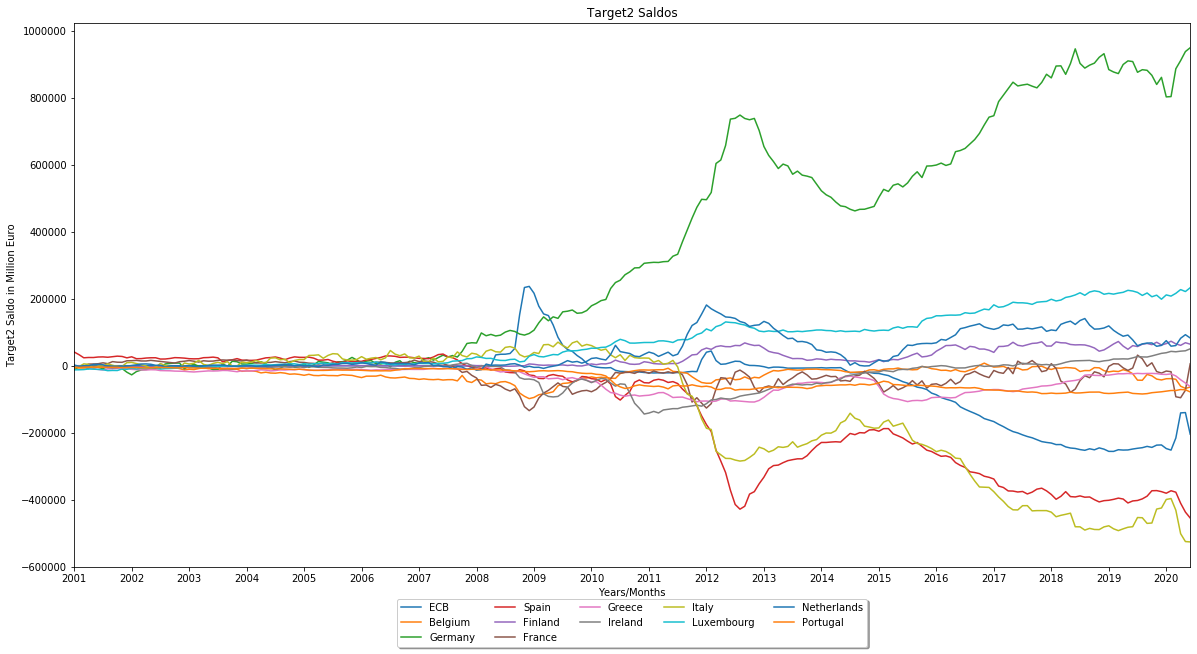

In [91]:
# hide
years = np.arange(2001, 2021, 1);
plt.figure();
ax = df_average.plot(kind='line', figsize=(20,10), title='Target2 Saldos');
plt.xlabel('Years/Months');
plt.ylabel('Target2 Saldo in Million Euro');
plt.xticks(np.arange(0, df_average.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

In [92]:
df_average

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,0.00,-6492.05,-11567.59,40955.41,-1172.95,-1552.27,-1121.91,-2983.82,-7614.55,-12389.86,2025.45,-5172.27
2001-02,0.00,-6924.85,-2932.05,32958.50,-2030.95,-225.85,-1374.70,-4317.45,-2692.00,-12185.80,-1638.65,-5403.90
2001-03,0.00,-7038.00,-1796.82,23675.64,-1960.18,-1545.00,-4364.59,-3889.77,5488.41,-11612.23,37.14,-4637.36
2001-04,0.00,-6280.00,-8959.05,24549.95,-1803.00,4843.25,-6471.95,-3493.30,4106.70,-9840.40,-60.75,-4111.05
2001-05,0.00,-7967.52,3683.30,24455.74,-1599.48,5083.87,-9141.22,-4743.13,-7360.04,-10284.48,3746.87,-4202.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-38563.39,804003.90,-373576.57,73128.73,-17946.67,-24467.17,42822.30,-396863.33,207962.74,58333.34,-74062.22
2020-03,-216035.05,-40553.48,887124.79,-377902.06,65242.28,-92730.30,-30609.21,41601.59,-431657.25,216206.93,60224.48,-74089.54
2020-04,-141005.55,-61206.92,911528.46,-410801.66,60826.25,-95655.67,-41992.63,43445.91,-501833.24,227436.80,81910.45,-71090.95


<Figure size 432x288 with 0 Axes>

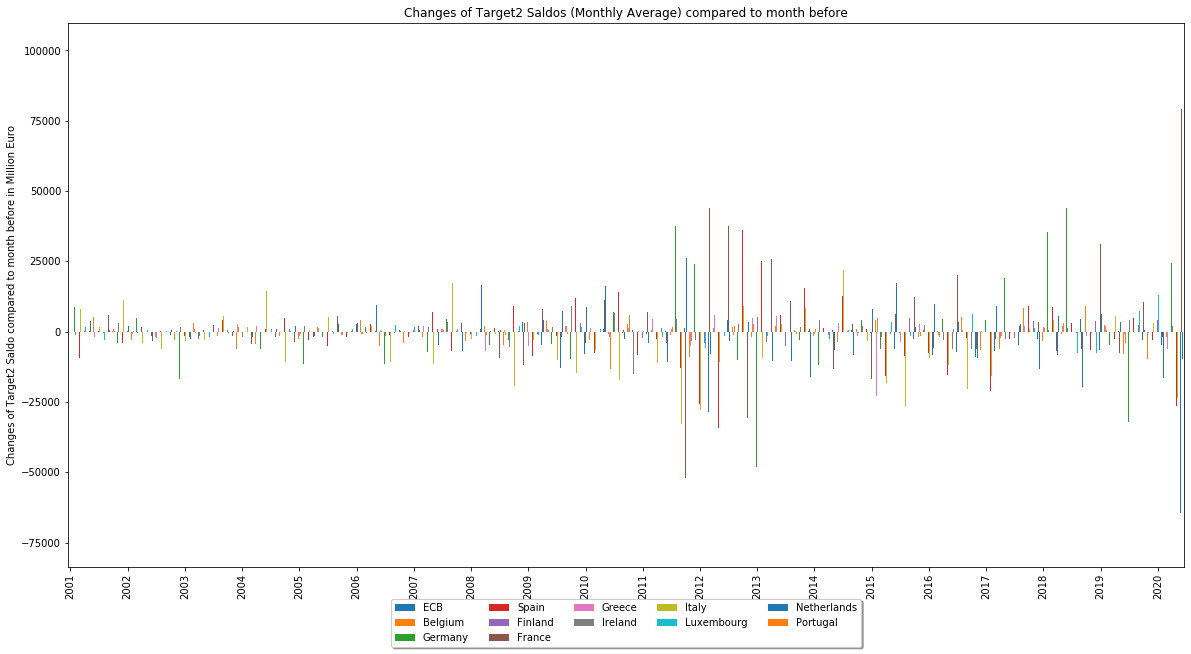

In [93]:
# hide
years = np.arange(2001, 2021, 1);
plt.figure();
ax = df_average_change.plot(kind='bar', figsize=(20,10), title='Changes of Target2 Saldos (Monthly Average) compared to month before');
plt.xlabel('Years/Months');
plt.ylabel('Changes of Target2 Saldo compared to month before in Million Euro');
plt.xticks(np.arange(0, df_average_change.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

<Figure size 432x288 with 0 Axes>

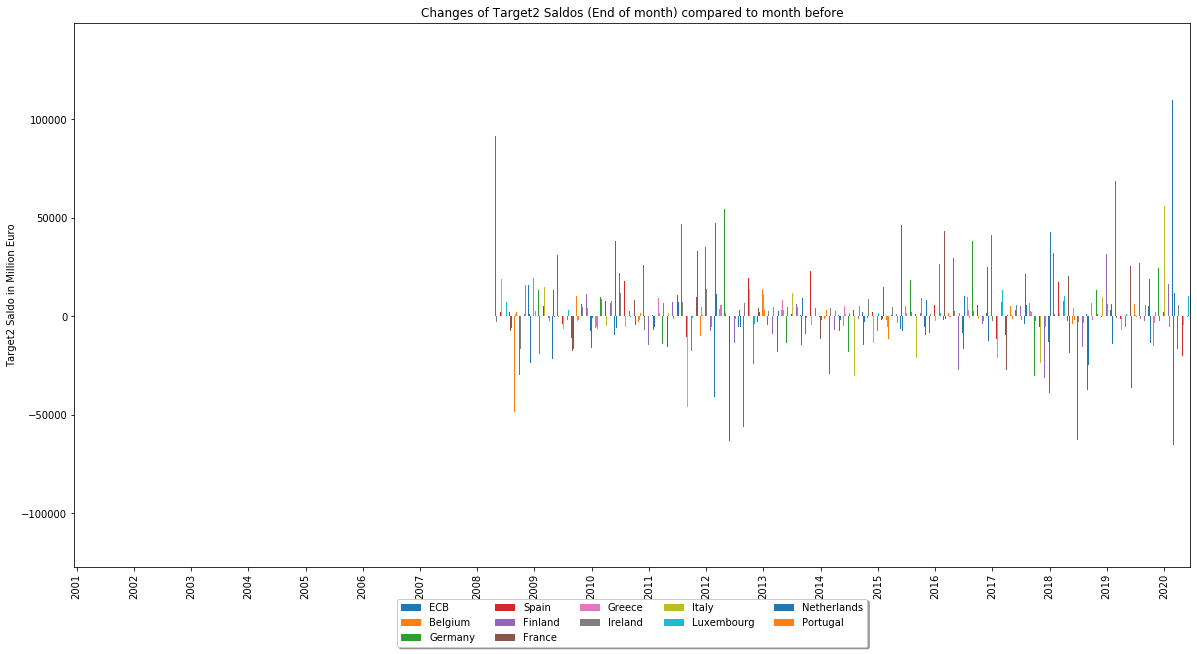

In [94]:
# hide
years = np.arange(2001, 2021, 1);
plt.figure();
ax = df_end_period_change.plot(kind='bar', figsize=(20,10), title='Changes of Target2 Saldos (End of month) compared to month before');
plt.xlabel('Years/Months');
plt.ylabel('Target2 Saldo in Million Euro');
plt.xticks(np.arange(0, df_end_period_change.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

# Average of Target2 per month

### Compare Saldos of all banks

In [95]:
df_average

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,0.00,-6492.05,-11567.59,40955.41,-1172.95,-1552.27,-1121.91,-2983.82,-7614.55,-12389.86,2025.45,-5172.27
2001-02,0.00,-6924.85,-2932.05,32958.50,-2030.95,-225.85,-1374.70,-4317.45,-2692.00,-12185.80,-1638.65,-5403.90
2001-03,0.00,-7038.00,-1796.82,23675.64,-1960.18,-1545.00,-4364.59,-3889.77,5488.41,-11612.23,37.14,-4637.36
2001-04,0.00,-6280.00,-8959.05,24549.95,-1803.00,4843.25,-6471.95,-3493.30,4106.70,-9840.40,-60.75,-4111.05
2001-05,0.00,-7967.52,3683.30,24455.74,-1599.48,5083.87,-9141.22,-4743.13,-7360.04,-10284.48,3746.87,-4202.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-38563.39,804003.90,-373576.57,73128.73,-17946.67,-24467.17,42822.30,-396863.33,207962.74,58333.34,-74062.22
2020-03,-216035.05,-40553.48,887124.79,-377902.06,65242.28,-92730.30,-30609.21,41601.59,-431657.25,216206.93,60224.48,-74089.54
2020-04,-141005.55,-61206.92,911528.46,-410801.66,60826.25,-95655.67,-41992.63,43445.91,-501833.24,227436.80,81910.45,-71090.95


In [96]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')
source

,Year / Months,Central Banks,Target2 Saldo
0,2001-01,ECB,0.00
1,2001-02,ECB,0.00
2,2001-03,ECB,0.00
3,2001-04,ECB,0.00
4,2001-05,ECB,0.00
...,...,...,...
2803,2020-02,Portugal,-74062.22
2804,2020-03,Portugal,-74089.54
2805,2020-04,Portugal,-71090.95
2806,2020-05,Portugal,-71994.86


In [97]:
# hide-input
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year / Months'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N'
)

In [107]:
# hide-input
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year / Months:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 
                       'Target2 Saldo:Q',
                       alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year / Months:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=700, height=500
)

alt.LayerChart(...)

In [99]:
line = ecb.plot_time_series_with_vertical_selector(df_average, 'Year / Months', 'Target2 Saldo', 'Central Banks')
line 

In [100]:
type(line)

NoneType

In [101]:
source = df_average
x_value = 'Year / Months'
y_value = 'Target2 Saldo'
var_name = 'Central Banks'

def altair_plot(source, x_value, y_value, var_name):
    source = source.reset_index().melt(x_value, var_name=var_name, value_name=y_value)

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=[x_value], empty='none')

    # The basic line
    line = alt.Chart(source).mark_line(interpolate='basis').encode(
        x=f'{x_value}:T',
        y=f'{y_value}:Q',
        color=f'{var_name}:N'
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
        x=f'{x_value}:T',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 
                        f'{y_value}:Q',
                        alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
        x=f'{x_value}:T',
    ).transform_filter(
        nearest
    )

    return alt.layer(
        line, selectors, points, rules, text
    ).properties(
        width=700, height=500
    )
    
altair_plot(source, x_value, y_value, var_name)

alt.LayerChart(...)

In [102]:
ecb.plot_time_series_with_vertical_selector(source, x_value, y_value, var_name)

### Check single banks
Just click on the bank within the legend.

In [103]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')

In [104]:
# hide-input
selection = alt.selection_multi(fields=['Central Banks'], bind='legend')

In [106]:
# hide-input
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N',
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip = [alt.Tooltip('Target2 Saldo'),
               alt.Tooltip('Central Banks'),
              ]
).add_selection(
    selection
).interactive().properties(
    width=700, height=500
)
line

alt.Chart(...)